In [1]:
import pandas as pd
import georinex as gr
import misc
from plots import *
import copy

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from logparser import LogReader, PosReader, RinexReader

# Prepare the data

In [2]:
# Load log files
measurements_log = ['Raw', 'Fix']
measurements_RINEX = sum([[f"{y}{x}" for y in ['C', 'L', 'D', 'S']] for x in ['1C', '5Q', '2I', '5P']], [])
# measurements_RINEX = ['L1C', 'L5Q']
# # 'C1C', 'C5Q', 'C2I', 'C5P'

logs = []

device_folder = "../.data/2023_Dataset_Hervanta/S4_dynamic_lake/raw"
reference_folder = "../.data/2023_Dataset_Hervanta/S4_dynamic_lake/_reference/rover"

rinex_ref = RinexReader('Reference', 
            filepath=f"{reference_folder}/NMND17420010S_2023-08-11_12-31-17.23O",
            tlim=[], meas=measurements_RINEX, sampling=1)

log = LogReader(manufacturer="Google", device="Pixel 7", acronym='GP7', specifiedTags=measurements_log, mode="mimir", 
                filepath=f"{device_folder}/log_GooglePixel7_20230811150244_modified.txt")
log.ref = rinex_ref
log.pos = PosReader(f"{reference_folder}/NMND17420010S_2023-08-11_12-31-17.pos")
logs.append(log)

log = LogReader(manufacturer="Google", device="Pixel Watch", acronym='GPW', specifiedTags=measurements_log, mode="mimir", 
                filepath=f"{device_folder}/log_GooglePixelWatch_20230811150346_modified.txt")
log.ref = rinex_ref
log.pos = PosReader(f"{reference_folder}/NMND17420010S_2023-08-11_12-31-17.pos")
logs.append(log)

log = LogReader(manufacturer="OnePlus", device="Nord 2", acronym='ON2', specifiedTags=measurements_log, mode="mimir", 
                filepath=f"{device_folder}/log_OnePlusNord2_20230811150159_modified.txt")
log.ref = rinex_ref
log.pos = PosReader(f"{reference_folder}/NMND17420010S_2023-08-11_12-31-17.pos")
logs.append(log)

log = LogReader(manufacturer="Samsung", device="A52", acronym='A52', specifiedTags=measurements_log, mode="mimir", 
                filepath=f"{device_folder}/log_SamsungA52_20230811150240_modified.txt")
log.ref = rinex_ref
log.pos = PosReader(f"{reference_folder}/NMND17420010S_2023-08-11_12-31-17.pos")
logs.append(log)

log = LogReader(manufacturer="Xiaomi", device="11T", acronym='X11', specifiedTags=measurements_log, mode="mimir", 
                filepath=f"{device_folder}/log_Xiaomi11_20230811150208_modified.txt")
log.ref = rinex_ref
log.pos = PosReader(f"{reference_folder}/NMND17420010S_2023-08-11_12-31-17.pos")
logs.append(log)

device_list = [log.device for log in logs]

In [3]:
log.raw.loc[log.raw['prn'].isin(['C20-L5']), ['CarrierFrequencyHz']]


CarrierFrequencyHz
datetime                                   
2023-08-11 12:02:11.711        1.176450e+09
2023-08-11 12:02:12.199        1.176450e+09
2023-08-11 12:02:14.236        1.176450e+09
2023-08-11 12:02:15.687        1.176450e+09
2023-08-11 12:02:17.666        1.176450e+09
...                                     ...
2023-08-11 12:30:17.695        1.176450e+09
2023-08-11 12:30:18.664        1.176450e+09
2023-08-11 12:30:21.696        1.176450e+09
2023-08-11 12:30:22.608        1.176450e+09
2023-08-11 12:30:23.607        1.176450e+09

[857 rows x 1 columns]

In [4]:
log.pos.df

provider     timestamp   latitude  longitude  altitude
datetime                                                                  
2023-08-11 12:02:51      REF  1.691755e+09  61.449225  23.856265  163.0054
2023-08-11 12:02:52      REF  1.691755e+09  61.449225  23.856266  163.0078
2023-08-11 12:02:53      REF  1.691755e+09  61.449225  23.856266  163.0047
2023-08-11 12:02:54      REF  1.691755e+09  61.449224  23.856266  163.0140
2023-08-11 12:02:55      REF  1.691755e+09  61.449224  23.856266  163.0222
...                      ...           ...        ...        ...       ...
2023-08-11 12:31:13      REF  1.691757e+09  61.449228  23.856277  163.3463
2023-08-11 12:31:14      REF  1.691757e+09  61.449221  23.856276  163.0440
2023-08-11 12:31:15      REF  1.691757e+09  61.449224  23.856277  162.9784
2023-08-11 12:31:16      REF  1.691757e+09  61.449226  23.856278  162.9083
2023-08-11 12:31:17      REF  1.691757e+09  61.449226  23.856278  162.8982

[1678 rows x 5 columns]

In [5]:
log.ref.df

time   sv signal   doppler         phase   pseudorange  \
0     2023-08-11 12:03:09  C05     2I   -40.322  2.086701e+08  4.007290e+07   
1     2023-08-11 12:03:09  C06     2I    11.604  1.943435e+08  3.732162e+07   
2     2023-08-11 12:03:09  C09     2I   579.245  1.956172e+08  3.756622e+07   
3     2023-08-11 12:03:09  C16     2I  -141.250  1.970614e+08  3.784356e+07   
4     2023-08-11 12:03:09  C20     2I  2866.198  1.244677e+08  2.390271e+07   
...                   ...  ...    ...       ...           ...           ...   
82889 2023-08-11 12:31:35  R09     1C  3472.252  1.214006e+08  2.273451e+07   
82890 2023-08-11 12:31:35  R16     1C   -10.864  1.162980e+08  2.177130e+07   
82891 2023-08-11 12:31:35  R22     1C -4568.948  1.228974e+08  2.302290e+07   
82892 2023-08-11 12:31:35  R23     1C -1753.994  1.065630e+08  1.992090e+07   
82893 2023-08-11 12:31:35  R24     1C  2568.234  1.122115e+08  2.098419e+07   

          snr     prn system frequency  pseudorange_rate  pseudorange_error  \
0      40.839  C05-L1      C        L1               NaN                NaN   
1      46.821  C06-L1      C        L1               NaN                NaN   
2      47.068  C09-L1      C        L1               NaN                NaN   
3      48.602  C16-L1      C        L1               NaN                NaN   
4      51.394  C20-L1      C        L1               NaN                NaN   
...       ...     ...    ...       ...               ...                ...   
82889  44.560  R09-L1      R        L1          -650.322              0.054   
82890  50.563  R16-L1      R        L1             1.913              0.252   
82891  38.385  R22-L1      R        L1           855.813             -0.203   
82892  46.564  R23-L1      R        L1           327.751              0.016   
82893  50.967  R24-L1      R        L1          -480.371              0.154   

       phase_rate  phase_error  doppler_error  
0             NaN          NaN            NaN  
1             NaN          NaN            NaN  
2             NaN          NaN            NaN  
3             NaN          NaN            NaN  
4             NaN          NaN            NaN  
...           ...          ...            ...  
82889   -3472.639        0.313         -0.571  
82890      10.220        1.401         -1.184  
82891    4568.497       -0.961         -1.018  
82892    1753.280        0.097         -1.370  
82893   -2568.772        0.810         -0.834  

[82894 rows x 15 columns]

In [6]:
# only keep GPS provider
log.fix = log.fix.loc[log.fix["provider"] == 'GPS']

In [7]:
# Compute ENU errors
ref_enu = [61.44922404, 23.8562781, 162.711]
for log in logs:
    # Convert to ENU based on reference
    log.fix[["east", "north", "up"]] = log.fix.apply(
        lambda row: misc.convert2ENU(row['latitude'], row['longitude'], row['altitude'], ref_enu), 
        axis='columns', result_type='expand')

    # window = 1
    # log.pos.df["latitude_avg"] = log.pos.df["latitude"].rolling(window).mean()
    # log.pos.df["longitude_avg"] = log.pos.df["longitude"].rolling(window).mean()
    # log.pos.df["altitude_avg"] = log.pos.df["altitude"].rolling(window).mean()

    log.pos.df[["east", "north", "up"]] = log.pos.df.apply(
        lambda row: misc.convert2ENU(row['latitude'], row['longitude'], row['altitude'], ref_enu), 
        axis='columns', result_type='expand')

    # Align/interpolates dataframes
    pos_A, pos_B = log.fix[["east", "north", "up"]].align(log.pos.df[["east", "north", "up"]])
    log.diff = pos_B.interpolate(method='time') - pos_A.interpolate(method='time')
    log.diff.dropna(how='all', inplace=True)
    
    log.diff[["2D_error"]] = log.diff.apply(
        lambda row: misc.getHorizontalError(row['east'], row['north']), 
        axis='columns', result_type='expand')
    
    log.diff[["3D_error"]] = log.diff.apply(
        lambda row: misc.get3DError(row['east'], row['north'], row['up']), 
        axis='columns', result_type='expand')

    print(f"--- {log.device} ---")
    print(log.diff[["east", "north", "up", "2D_error", "3D_error"]].describe())

--- Pixel 7 ---
              east        north           up     2D_error     3D_error
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000
mean     -0.599754     1.734157    -2.449372     2.665432     3.982479
std       1.741432     1.737825     1.963635     1.520968     1.847087
min      -6.781184    -7.041618    -9.225822     0.091744     0.188333
25%      -1.596419     0.596381    -3.692243     1.689444     2.583406
50%      -0.562214     1.576143    -2.695912     2.363173     3.754514
75%       0.735693     2.779202    -1.121594     3.412322     4.929998
max       6.743370    12.986163     7.608855    13.171566    13.722374
--- Pixel Watch ---
              east        north           up     2D_error     3D_error
count  2303.000000  2303.000000  2303.000000  2303.000000  2303.000000
mean      0.165526     0.881295    -1.708972     2.784976     3.718145
std       2.285653     2.120701     2.329772     1.663296     2.246129
min      -6.044013   -10.517668   -55.758

In [8]:
log.diff

east     north        up  2D_error  3D_error
datetime                                                             
2023-08-11 12:02:51 -0.441680  1.297713 -4.894600  1.370817  5.082937
2023-08-11 12:02:52 -0.409514  1.252803 -4.892200  1.318035  5.066640
2023-08-11 12:02:53 -0.409141  1.250017 -4.895300  1.315271  5.068915
2023-08-11 12:02:54 -0.397832  1.224497 -4.886000  1.287503  5.052787
2023-08-11 12:02:55 -0.388017  1.203546 -4.877800  1.264548  5.039049
...                       ...       ...       ...       ...       ...
2023-08-11 12:31:13 -0.005014  5.301841  0.146302  5.301843  5.303861
2023-08-11 12:31:14 -0.028858  4.522545 -0.155998  4.522637  4.525327
2023-08-11 12:31:15  0.043048  4.919827 -0.221598  4.920015  4.925003
2023-08-11 12:31:16  0.078574  5.093672 -0.291698  5.094278  5.102623
2023-08-11 12:31:17  0.078308  5.094006 -0.301798  5.094608  5.103539

[1697 rows x 5 columns]

# Results

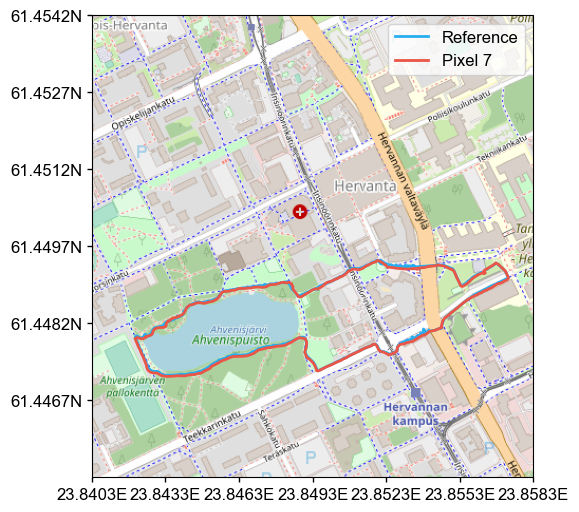

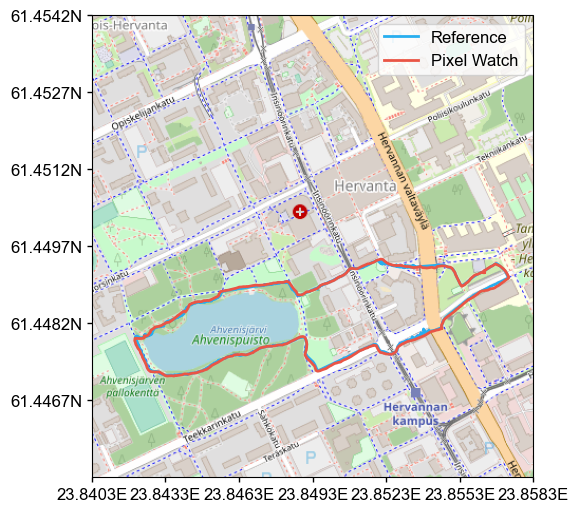

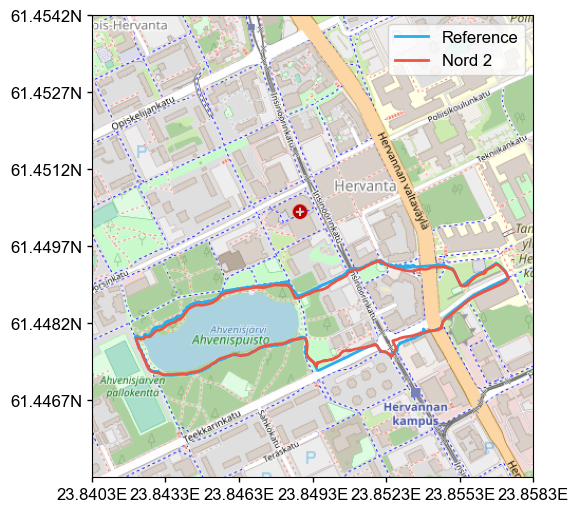

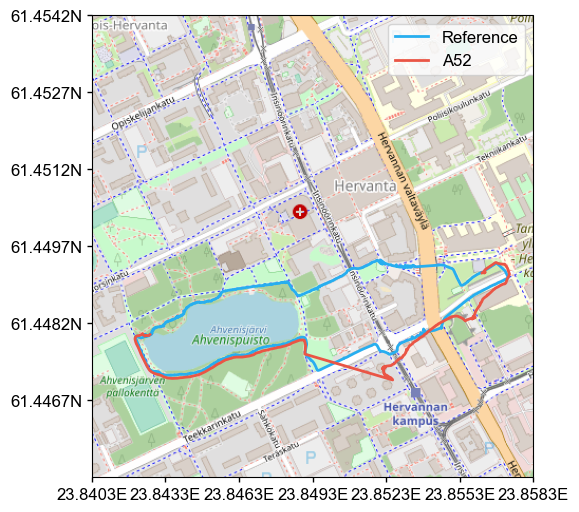

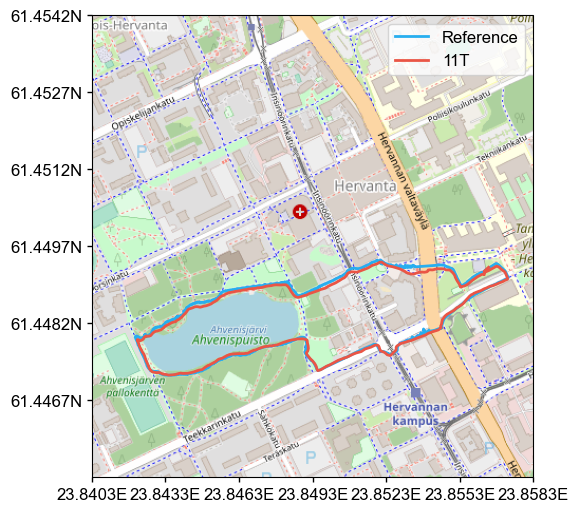

In [9]:
center = ref_enu[:2]
extent = [center[1] - 0.016, center[1] + 0.002, center[0] - 0.004, center[0] + 0.005]
for log in logs:
    locations = {}
    locations['Reference'] = log.pos.df[["latitude", "longitude"]]
    locations[log.device] = log.fix.loc[log.fix['provider'].isin(['GPS']), ["latitude", "longitude"]]
    plotMap(locations=locations, extent=extent, scale=15)

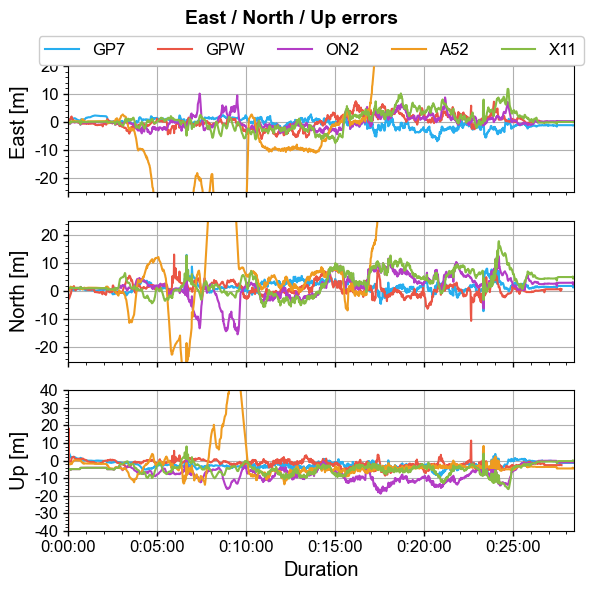

In [10]:
plotENU(logs, lim=[25,25,40], yticks=[2, 10, 2, 10, 2, 10], xticks=[60, 300], mode='difference')

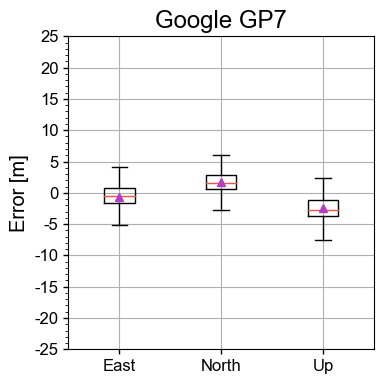

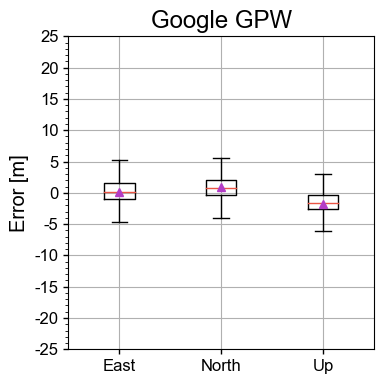

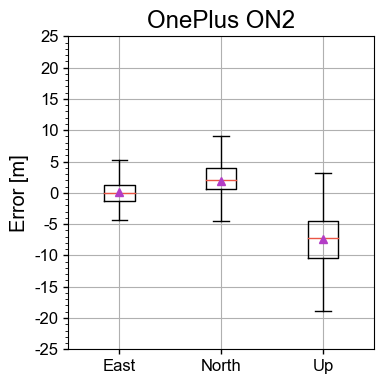

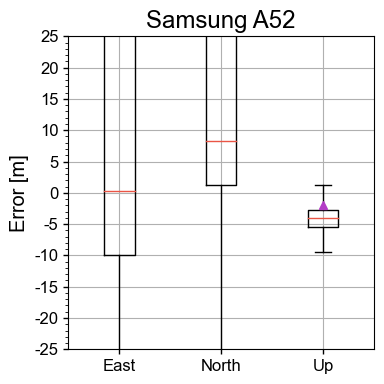

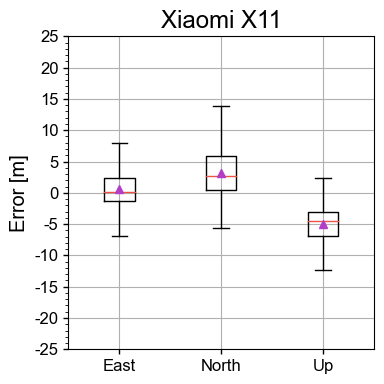

In [11]:
plotStatisticsENU(logs, mode='box', lim=25, ticks=[1, 5])

### Visibility

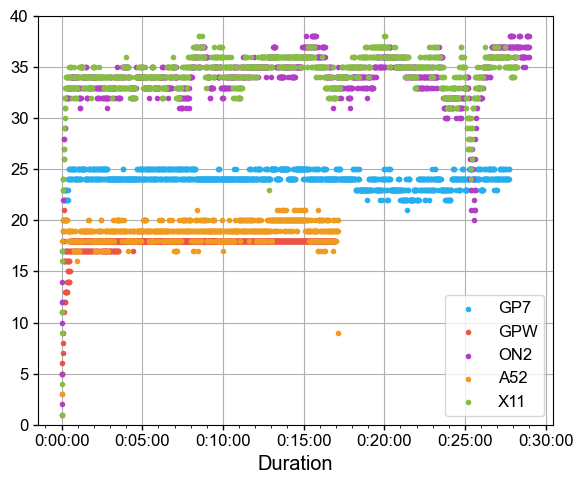

In [12]:
plotTotalSignalsPerEpochs(logs, lim=[0, 40], ticks=[60, 300], mode='signal')

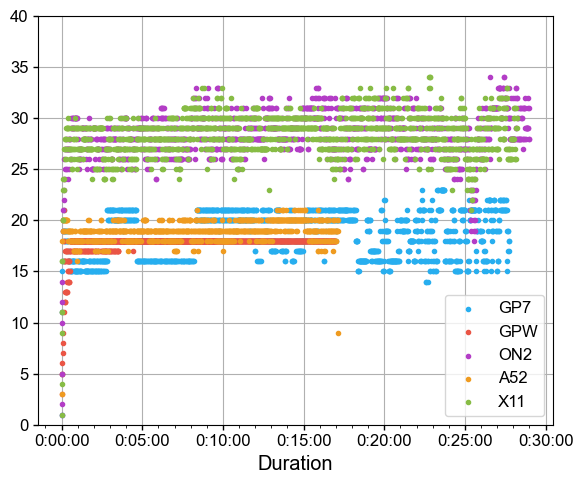

In [13]:
plotTotalSignalsPerEpochs(logs, lim=[0, 40], ticks=[60, 300], mode='satellite')

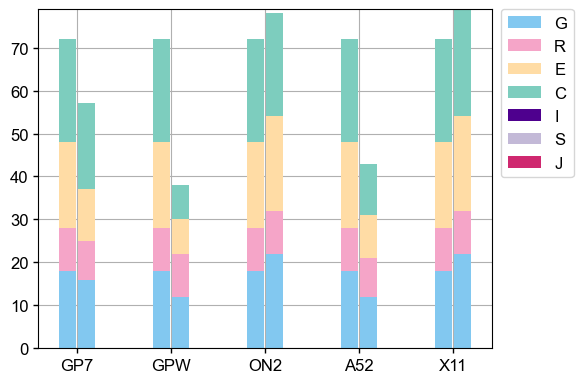

In [14]:
plotBarSignalsPerSystem(logs)

In [15]:
statsSignalsPerSystem(logs)

device   G  G_ref   R  R_ref   E  E_ref   C  C_ref  I  I_ref  S  S_ref  J  \
0    GP7  16     18   9     10  12     20  20     24  0      0  0      0  0   
1    GPW  12     18  10     10   8     20   8     24  0      0  0      0  0   
2    ON2  22     18  10     10  22     20  24     24  0      0  0      0  0   
3    A52  12     18   9     10  10     20  12     24  0      0  0      0  0   
4    X11  22     18  10     10  22     20  25     24  0      0  0      0  0   

   J_ref  
0      0  
1      0  
2      0  
3      0  
4      0

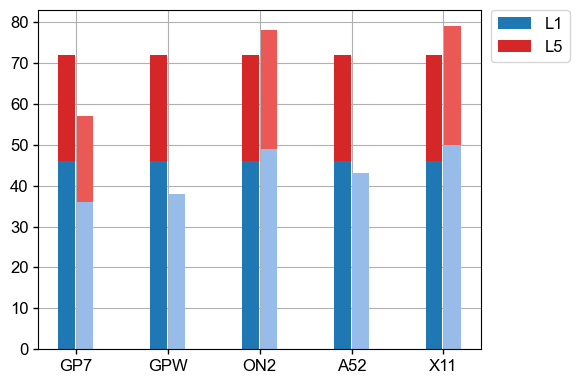

In [16]:
plotBarSignalsPerFrequency(logs)

In [17]:
statsSignalsPerFrequency(logs)

device  L1  L1_ref  L5  L5_ref
0    GP7  36      46  21      26
1    GPW  38      46   0      26
2    ON2  49      46  29      26
3    A52  43      46   0      26
4    X11  50      46  29      26

### Measurements

Pseudoranges

In [18]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    log.raw = misc.filterValues(log.raw, 'PseudorangeAcceleration', 300)
    log.raw[list(misc.GnssState_Str.values())] = log.raw.apply(lambda row: misc.getSplitState(row['State'], bits=17, type='tracking'), axis='columns', result_type='expand')
    stats.append(log.raw['PseudorangeAcceleration'].describe(percentiles=[0.5, .667, .95, .997]))
stats = pd.concat(stats, keys=device_list, axis=1).T
stats


--- Pixel 7 ---
Rows removed 21 (0.055%)
--- Pixel Watch ---
Rows removed 68 (0.274%)
--- Nord 2 ---
Rows removed 74 (0.127%)
--- A52 ---
Rows removed 4 (0.021%)
--- 11T ---
Rows removed 111 (0.193%)


count      mean        std         min       50%     66.7%  \
Pixel 7      38227.0  0.140741  12.020270 -224.974773  0.110411  1.848541   
Pixel Watch  24723.0  0.167810  14.831199 -261.696502  0.125670  1.796330   
Nord 2       58265.0  0.063678   5.214955 -102.421710  0.083267  0.715209   
A52          19403.0  0.053915  13.571729 -216.616819  0.153322  1.633393   
11T          57263.0  0.603193  25.354019 -261.007465  0.160361  3.192309   

                   95%       99.7%         max  
Pixel 7      17.267796   52.428067  154.112528  
Pixel Watch  17.006935   77.980208  274.382544  
Nord 2        6.456258   21.747288  115.494776  
A52          16.683893   65.534229  176.996236  
11T          40.472028  115.109841  271.240216

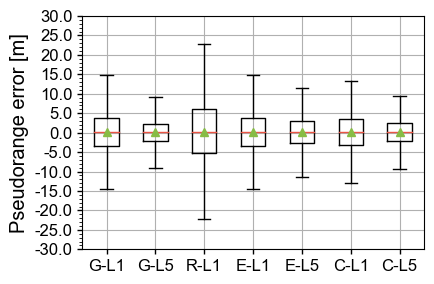

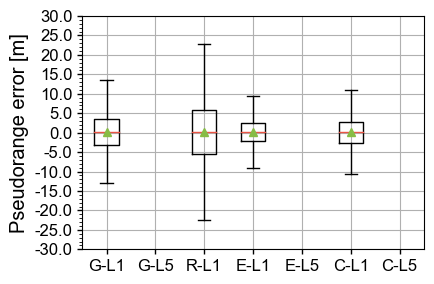

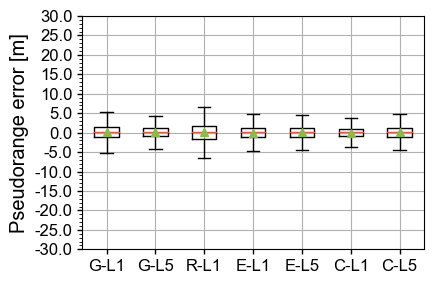

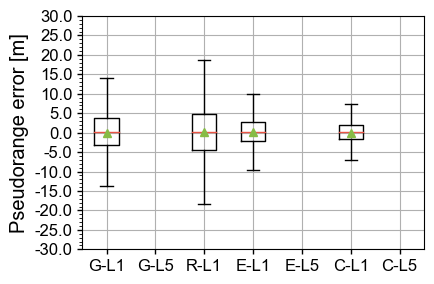

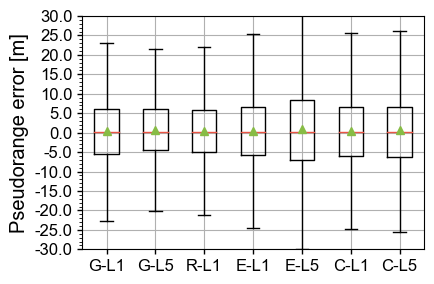

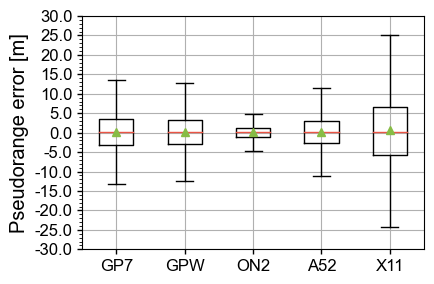

In [19]:

plotStatisticsDataBox(_logs, 
                      'PseudorangeAcceleration', 
                      'Pseudorange error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=30,
                      ticks=[1,5])


In [20]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    log.ref.df = misc.filterValues(log.ref.df, 'pseudorange_error', 300)
    stats.append(log.ref.df['pseudorange_error'].describe(percentiles=[0.5, .667, .95, .997]))
stats = pd.concat(stats, keys=device_list, axis=1).T
stats


--- Pixel 7 ---
Rows removed 6423 (7.762%)
--- Pixel Watch ---
Rows removed 0 (0.000%)
--- Nord 2 ---
Rows removed 0 (0.000%)
--- A52 ---
Rows removed 0 (0.000%)
--- 11T ---
Rows removed 0 (0.000%)


count      mean        std      min    50%  66.7%     95%  \
Pixel 7      76327.0  0.011696  26.507429 -299.909  0.075  0.122  0.9407   
Pixel Watch  76327.0  0.011696  26.507429 -299.909  0.075  0.122  0.9407   
Nord 2       76327.0  0.011696  26.507429 -299.909  0.075  0.122  0.9407   
A52          76327.0  0.011696  26.507429 -299.909  0.075  0.122  0.9407   
11T          76327.0  0.011696  26.507429 -299.909  0.075  0.122  0.9407   

                  99.7%      max  
Pixel 7      212.964156  299.144  
Pixel Watch  212.964156  299.144  
Nord 2       212.964156  299.144  
A52          212.964156  299.144  
11T          212.964156  299.144

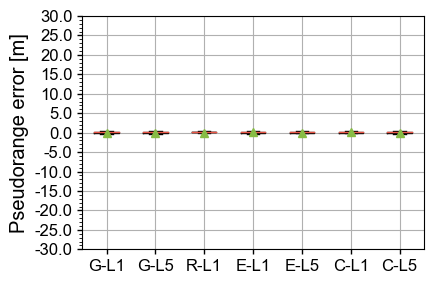

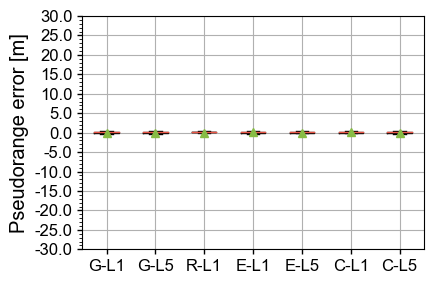

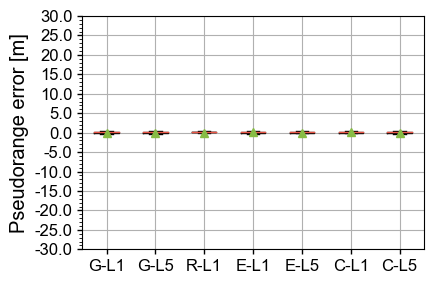

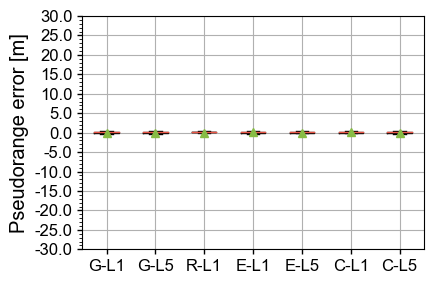

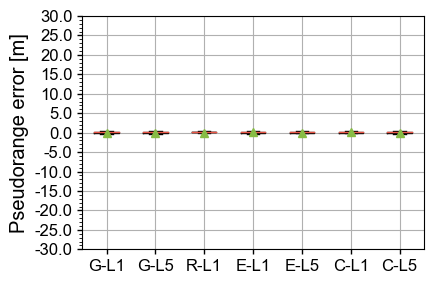

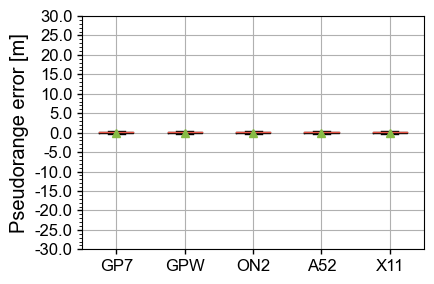

In [21]:

plotStatisticsDataBox(_logs, 
                      'pseudorange_error', 
                      'Pseudorange error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=30,
                      ticks=[1,5],
                      mode='ref')


In [22]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    log.raw[list(misc.GnssState_Str.values())] = log.raw.apply(lambda row: misc.getSplitState(row['State'], bits=17, type='tracking'), axis='columns', result_type='expand')
    count = log.raw[list(misc.GnssState_Str.values())].count()
    stats.append(log.raw[list(misc.GnssState_Str.values())].sum().div(count))
stats = pd.concat(stats, keys=device_list, axis=1)
stats

Pixel 7  Pixel Watch    Nord 2       A52  \
TRACK_UNKNOWN                0.000000     0.000000  0.000000  0.000000   
TRACK_CODE_LOCK              0.809970     0.674565  1.000000  1.000000   
TRACK_BIT_SYNC               0.856288     0.852162  0.678628  0.999846   
TRACK_SUBFRAME_SYNC          0.475176     0.444791  0.548599  0.999846   
TRACK_TOW_DECODED            0.336321     0.450928  0.856396  0.999846   
TRACK_MSEC_AMBIGUOUS         0.017926     0.006562  0.013575  0.000000   
TRACK_SYMBOL_SYNC            0.858041     0.852729  0.678628  0.000000   
TRACK_GLO_STRING_SYNC        0.149220     0.202568  0.130029  0.212146   
TRACK_GLO_TOD_DECODED        0.142961     0.144575  0.130029  0.212146   
TRACK_BDS_D2_BIT_SYNC        0.000000     0.000000  0.000000  0.000000   
TRACK_BDS_D2_SUBFRAME_SYNC   0.000000     0.000000  0.307797  0.000000   
TRACK_GAL_E1BC_CODE_LOCK     0.121204     0.164154  0.000000  0.233125   
TRACK_GAL_E1C_2ND_CODE_LOCK  0.222754     0.185365  0.000000  0.233125   
TRACK_GAL_E1B_PAGE_SYNC      0.004707     0.019579  0.000000  0.233125   
TRACK_SBAS_SYNC              0.000000     0.000000  0.000000  0.000000   
TRACK_TOW_KNOWN              0.817456     0.737311  0.844019  0.999846   
TRACK_GLO_TOD_KNOWN          0.156556     0.255205  0.130029  0.212146   
TRACK_S_2ND_CODE_LOCK        0.582659     0.364842  0.000000  0.000000   

                                  11T  
TRACK_UNKNOWN                0.000000  
TRACK_CODE_LOCK              1.000000  
TRACK_BIT_SYNC               0.672381  
TRACK_SUBFRAME_SYNC          0.545159  
TRACK_TOW_DECODED            0.856181  
TRACK_MSEC_AMBIGUOUS         0.016597  
TRACK_SYMBOL_SYNC            0.672381  
TRACK_GLO_STRING_SYNC        0.127222  
TRACK_GLO_TOD_DECODED        0.127222  
TRACK_BDS_D2_BIT_SYNC        0.000000  
TRACK_BDS_D2_SUBFRAME_SYNC   0.311021  
TRACK_GAL_E1BC_CODE_LOCK     0.000000  
TRACK_GAL_E1C_2ND_CODE_LOCK  0.000000  
TRACK_GAL_E1B_PAGE_SYNC      0.000000  
TRACK_SBAS_SYNC              0.000000  
TRACK_TOW_KNOWN              0.834558  
TRACK_GLO_TOD_KNOWN          0.127222  
TRACK_S_2ND_CODE_LOCK        0.000000

Doppler

In [23]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    log.raw = misc.filterValues(log.raw, 'DopplerError', 30)
    #log.raw = misc.filterPercentile(log.raw, 'DopplerError', 0.997)
    stats.append(log.raw['DopplerError'].describe(percentiles=[0.5, .667, .95, .997]).T)
stats = pd.concat(stats, keys=device_list, axis=1).T
stats


--- Pixel 7 ---
Rows removed 34 (0.085%)
--- Pixel Watch ---
Rows removed 0 (0.000%)
--- Nord 2 ---
Rows removed 0 (0.000%)
--- A52 ---
Rows removed 0 (0.000%)
--- 11T ---
Rows removed 0 (0.000%)


count      mean       std        min       50%     66.7%  \
Pixel 7      39850.0  0.084613  0.610256 -19.214155  0.076430  0.165089   
Pixel Watch  28155.0  0.088161  0.394566  -6.177002  0.083843  0.182682   
Nord 2       59224.0  0.055051  0.958040 -21.950684  0.074084  0.345309   
A52          19453.0  0.077279  0.755144  -8.660982  0.073792  0.314628   
11T          58425.0  0.064122  0.845841 -18.460600  0.135597  0.348995   

                  95%     99.7%        max  
Pixel 7      0.697886  1.931245  29.231184  
Pixel Watch  0.669373  1.714441   6.730058  
Nord 2       1.518899  3.432939  22.329557  
A52          1.279587  3.024772   6.298895  
11T          1.175446  3.012900  25.563496

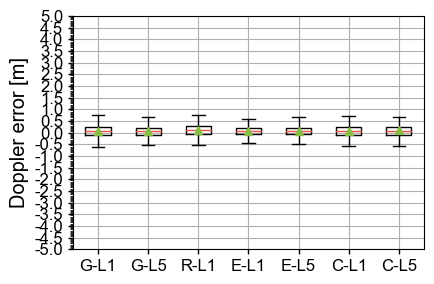

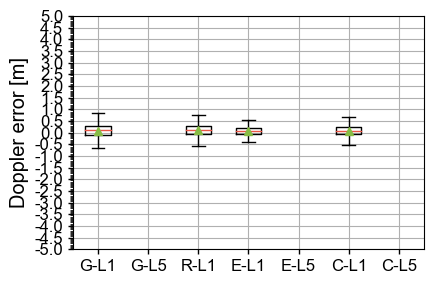

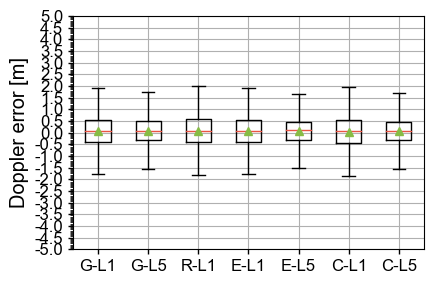

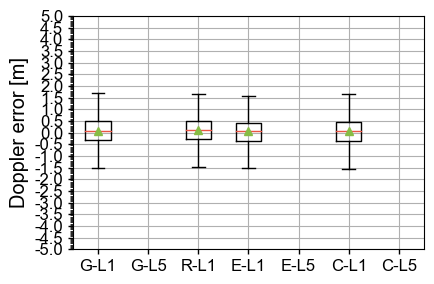

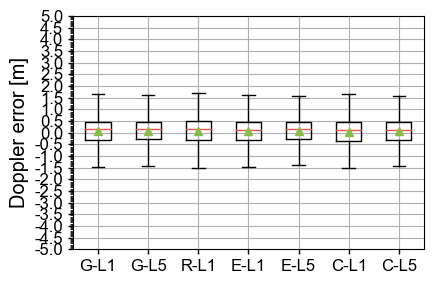

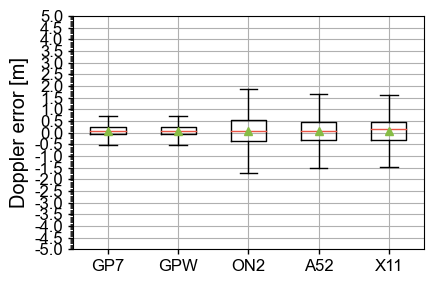

In [24]:

plotStatisticsDataBox(_logs, 
                      'DopplerError', 
                      'Doppler error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=5,
                      ticks=[0.05,0.5])

In [25]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    log.ref.df = misc.filterValues(log.ref.df, 'doppler_error', 30)
    #log.raw = misc.filterPercentile(log.raw, 'DopplerError', 0.997)
    stats.append(log.ref.df['doppler_error'].describe(percentiles=[0.5, .667, .95, .997]).T)
    stats.append(log.ref.df['doppler_error'].describe(percentiles=[0.5, .667, .95, .997]).T)
stats = pd.concat(stats, keys=device_list, axis=1).T
stats


--- Pixel 7 ---
Rows removed 46 (0.056%)
--- Pixel Watch ---
Rows removed 0 (0.000%)
--- Nord 2 ---
Rows removed 0 (0.000%)
--- A52 ---
Rows removed 0 (0.000%)
--- 11T ---
Rows removed 0 (0.000%)


count      mean       std     min    50%  66.7%    95%   99.7%  \
Pixel 7      82776.0 -0.439345  1.865651 -29.092 -0.344  0.029  1.994  6.7805   
Pixel Watch  82776.0 -0.439345  1.865651 -29.092 -0.344  0.029  1.994  6.7805   
Nord 2       82776.0 -0.439345  1.865651 -29.092 -0.344  0.029  1.994  6.7805   
A52          82776.0 -0.439345  1.865651 -29.092 -0.344  0.029  1.994  6.7805   
11T          82776.0 -0.439345  1.865651 -29.092 -0.344  0.029  1.994  6.7805   

                max  
Pixel 7      16.803  
Pixel Watch  16.803  
Nord 2       16.803  
A52          16.803  
11T          16.803

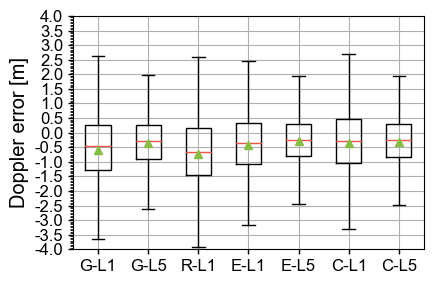

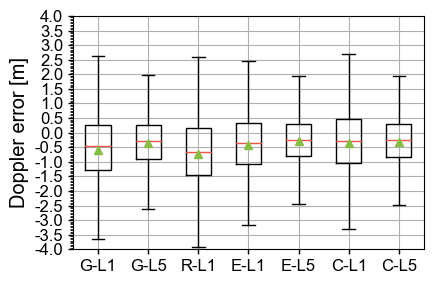

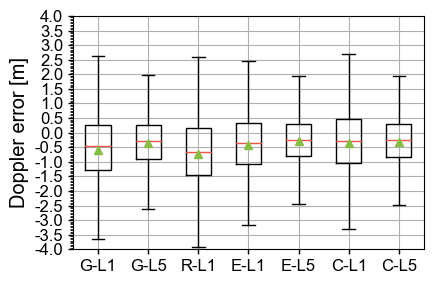

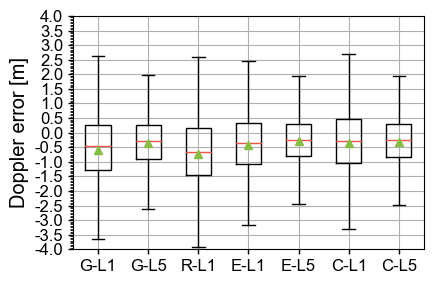

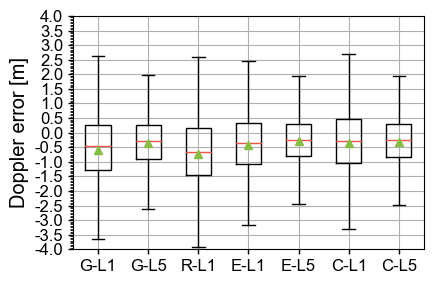

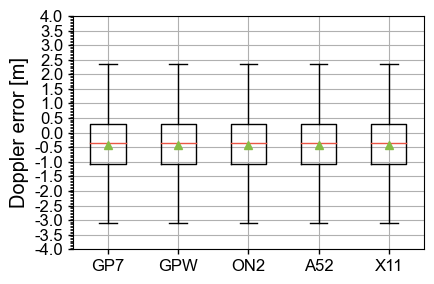

In [26]:

plotStatisticsDataBox(_logs, 
                      'doppler_error', 
                      'Doppler error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=4,
                      ticks=[0.05,0.5],
                      mode='ref')

Phases

In [27]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    #log.raw = misc.filterPercentile(log.raw, 'PhaseError', 0.997)
    log.raw = misc.filterValues(log.raw, 'PhaseError', 3)
    stats.append(log.raw['PhaseError'].describe(percentiles=[0.5, .667, .95, .997]).T)
stats = pd.concat(stats, keys=device_list, axis=1).T
stats

--- Pixel 7 ---
Rows removed 957 (2.403%)
--- Pixel Watch ---
Rows removed 279 (0.992%)
--- Nord 2 ---
Rows removed 989 (1.672%)
--- A52 ---
Rows removed 0 (0.000%)
--- 11T ---
Rows removed 936 (1.604%)


count      mean       std       min       50%     66.7%  \
Pixel 7      38870.0  0.089479  0.604902 -2.994889  0.077058  0.161225   
Pixel Watch  27838.0  0.100345  0.663944 -2.997448  0.085722  0.224991   
Nord 2       58157.0  0.073362  0.550313 -2.991462  0.089160  0.237047   
A52          19410.0  0.000000  0.000000  0.000000  0.000000  0.000000   
11T          57410.0  0.094232  0.661695 -2.993538  0.163823  0.327635   

                  95%     99.7%       max  
Pixel 7      1.077873  2.614117  2.995839  
Pixel Watch  1.225615  2.595866  2.995980  
Nord 2       0.899041  2.005704  2.989417  
A52          0.000000  0.000000  0.000000  
11T          1.072350  2.318394  2.999171

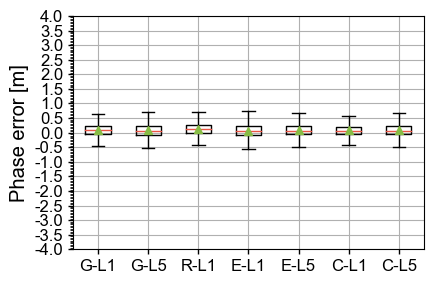

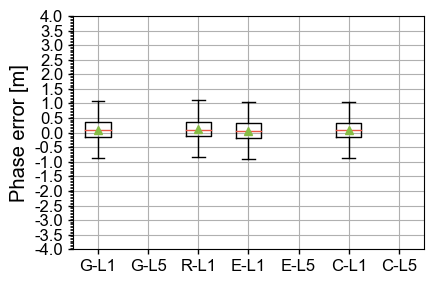

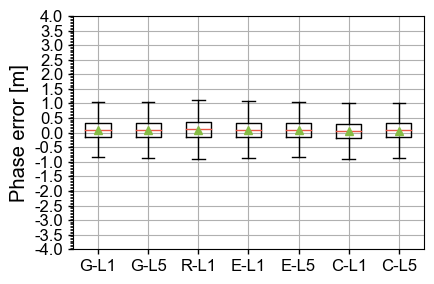

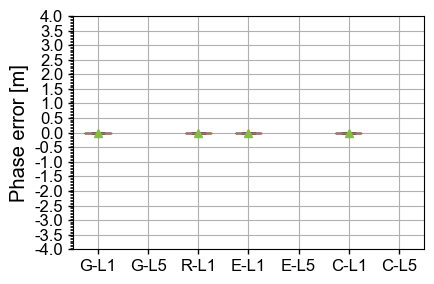

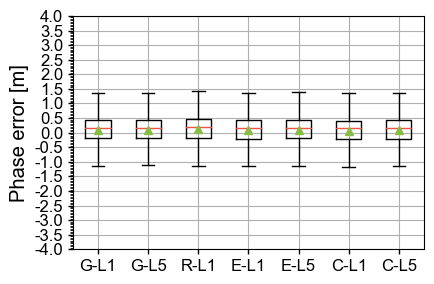

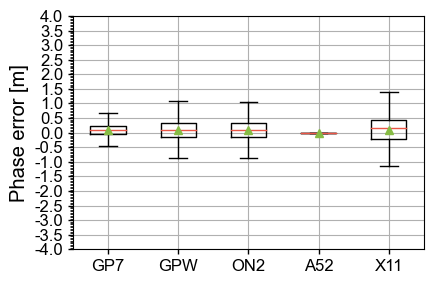

In [28]:

plotStatisticsDataBox(_logs, 
                      'PhaseError', 
                      'Phase error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=4,
                      ticks=[0.05,0.5])
    

In [29]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    log.ref.df = misc.filterValues(log.ref.df, 'phase_error', 500)
    stats.append(log.ref.df['phase_error'].describe(percentiles=[0.5, .667, .95, .997]).T)
stats = pd.concat(stats, keys=device_list, axis=1).T
stats

--- Pixel 7 ---
Rows removed 7679 (9.280%)
--- Pixel Watch ---
Rows removed 0 (0.000%)
--- Nord 2 ---
Rows removed 0 (0.000%)
--- A52 ---
Rows removed 0 (0.000%)
--- 11T ---
Rows removed 0 (0.000%)


count      mean        std      min    50%  66.7%     95%  \
Pixel 7      75071.0  0.361024  32.472517 -499.551  0.341  0.528  1.6125   
Pixel Watch  75071.0  0.361024  32.472517 -499.551  0.341  0.528  1.6125   
Nord 2       75071.0  0.361024  32.472517 -499.551  0.341  0.528  1.6125   
A52          75071.0  0.361024  32.472517 -499.551  0.341  0.528  1.6125   
11T          75071.0  0.361024  32.472517 -499.551  0.341  0.528  1.6125   

                 99.7%      max  
Pixel 7      255.38775  499.937  
Pixel Watch  255.38775  499.937  
Nord 2       255.38775  499.937  
A52          255.38775  499.937  
11T          255.38775  499.937

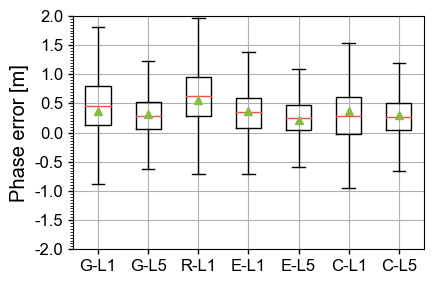

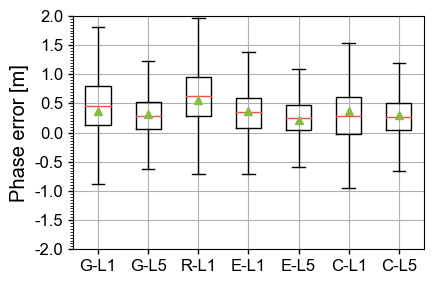

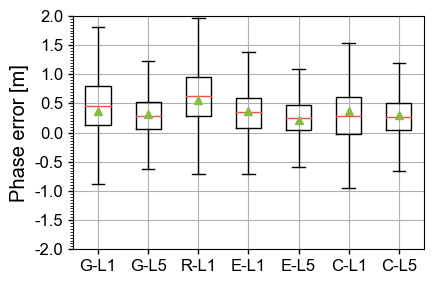

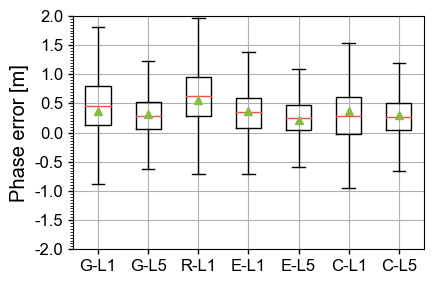

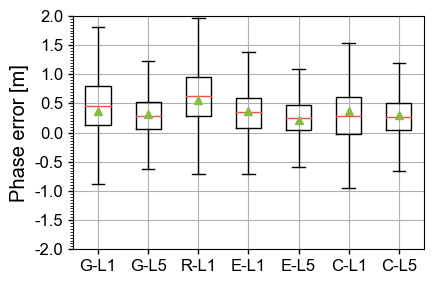

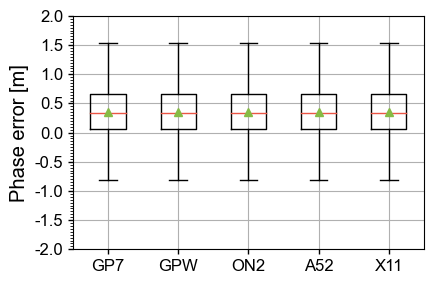

In [30]:

plotStatisticsDataBox(_logs, 
                      'phase_error', 
                      'Phase error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=2,
                      ticks=[0.05,0.5],
                      mode='ref')

In [31]:
stats = []
_logs = copy.deepcopy(logs)
for log in _logs:
    log.raw[list(misc.GnssStateADR_Str.values())] = log.raw.apply(lambda row: misc.getSplitState(row['AccumulatedDeltaRangeState'], bits=5, type='phase'), axis='columns', result_type='expand')
    count = log.raw[list(misc.GnssStateADR_Str.values())].count()
    stats.append(log.raw[list(misc.GnssStateADR_Str.values())].sum().div(count))
stats = pd.concat(stats, keys=device_list, axis=1)
stats

Pixel 7  Pixel Watch    Nord 2  A52       11T
ADR_UNKNOWN              0.000000     0.000000  0.000000  0.0  0.000000
ADR_VALID                0.391753     0.135566  0.597922  0.0  0.647289
ADR_RESET                0.000025     0.000000  0.000000  0.0  0.000000
ADR_CYCLE_SLIP           0.027140     0.031355  0.297342  0.0  0.310372
ADR_HALF_CYCLE_RESOLVED  0.315440     0.071223  0.345536  0.0  0.383478
ADR_HALF_CYCLE_REPORTED  1.000000     1.000000  1.000000  1.0  1.000000

C/N0

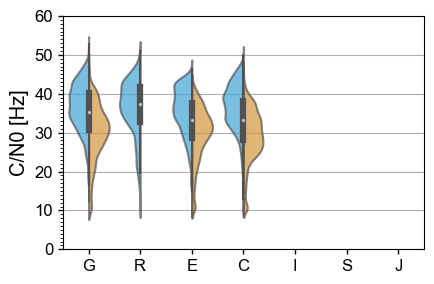

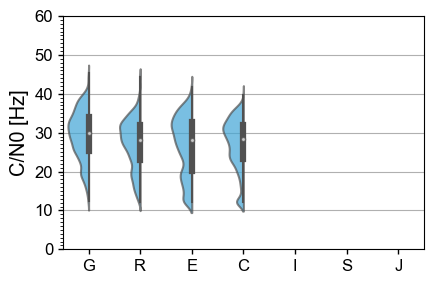

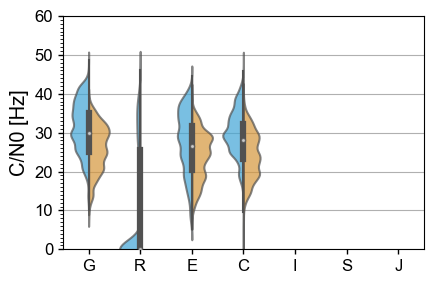

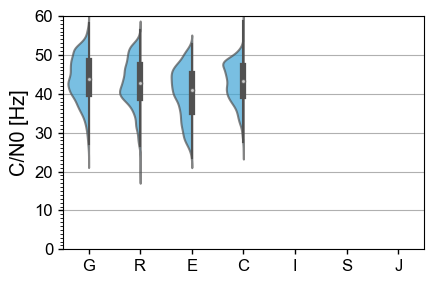

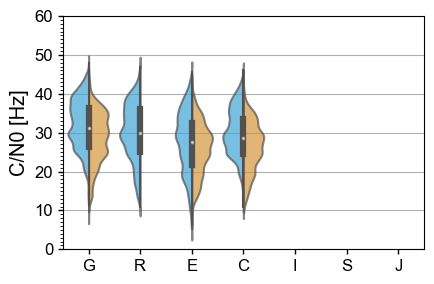

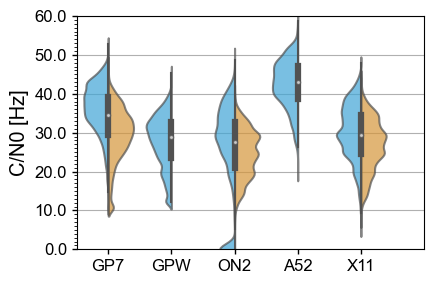

In [32]:
_logs = copy.deepcopy(logs)
plotStatisticsDataViolin(
    _logs, 
    'Cn0DbHz', 
    'C/N0 [Hz]', 
    ('G', 'R', 'E', 'C', 'I', 'S', 'J'), 
    ('L1', 'L5'),
    lim=60,
    ticks=[1,10])

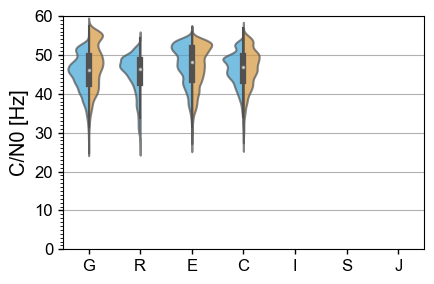

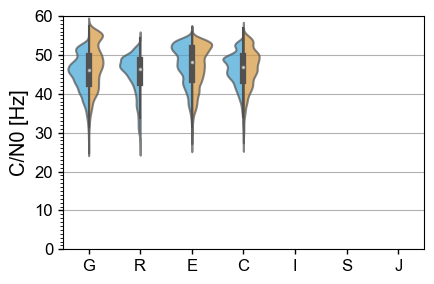

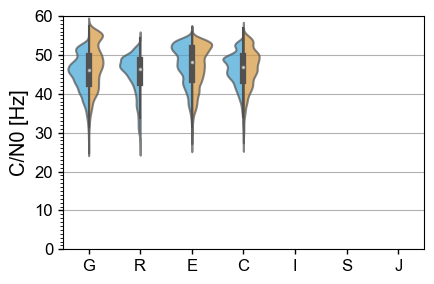

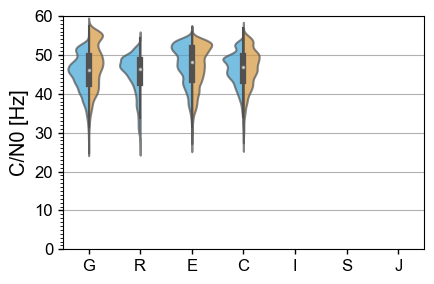

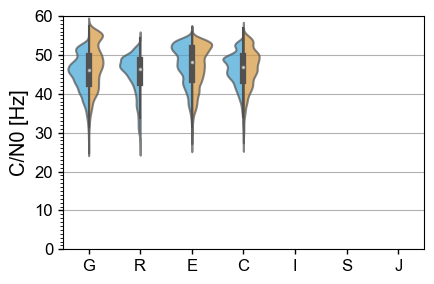

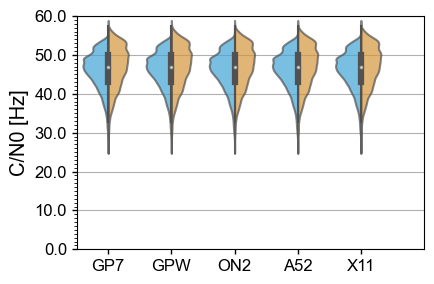

In [33]:
plotStatisticsDataViolin(
    _logs, 
    'snr', 
    'C/N0 [Hz]', 
    ('G', 'R', 'E', 'C', 'I', 'S', 'J'), 
    ('L1', 'L5'),
    lim=60,
    ticks=[1,10],
    mode='ref')